## Final Project Submission

Please fill out:
* Student name: **BRYSON SHITSUKANE**
* Student pace: self paced / part time / full time - **PART TIME**
* Scheduled project review date/time: **16/04/2023**
* Instructor name: **DIANA MONGINA**
* Blog post URL: **N/A**


# Box Office Analysis: Identifying Best Performing Movie Genres for Microsoft's New Studio

## Overview
This project analyzes the datasets from 3 movie websites namely, [Box Office Mojo](https://www.boxofficemojo.com/) , [TheMovieDB](https://www.themoviedb.org/) and [The Numbers](https://www.the-numbers.com/). The 3 datasets are merged into one pandas DataFrame to enable a more indepth analysis and better findings with regards to the top/best performing movie genres in the Box Office. Microsoft can use the findings from this analysis to help decide what type of films to create so as to stay at par in the movie industry.

## Business Understanding

Based on the business problem, which is, Microsoft wants to get in on the fun of creating movies/original video content but they have no knowledge of creating movies, I have formulated 4 business questions whereby I will use my dataset to extract meaningful findings which can be translated into actionable insights for the Head of Microsoft's new movie studio to help him/her decide on what types of films to create. These business questions are:

1. What are the top 4 best performing genres of movies at the box office?


2. What is the relationship between production budget and the success of a movie both domestically and worldwide?


3. What is the competitive landscape of the movie industry in terms of market share?


4. How does the release time of a movie contribute to its success?

Also, to define the idea of a successful movie in the Box Office and to get a comprehensive understanding of the current trends in the movie industry, I will be comparing different metrics such as domestic revenue, worldwide revenue, popularity ratings and vote count of the movies. Then I will compare the top genres across different groupings and look for patterns or similarities that may provide insight into overarching trends.

## Data Understanding 

The data sources for this analysis are 3 websites namely:
 - [Box Office Mojo](https://www.boxofficemojo.com/) 
 - [TheMovieDB](https://www.themoviedb.org/) 
 - [The Numbers](https://www.the-numbers.com/)

We therefore have 3 separate CSV data files:
 
 - `bom.movie_gross.csv.gz`: each record represents a movie title, with attributes of that movie (eg. `domestic_gross`).
 - `tmdb.movies.csv.gz`: each record represents a mvoie title as well, with attributes such as `release_date`.
 - `tn.movie_budgets.csv.gz`: each record represents a movie title as well, with attributes such as `production_budget`. 
 
Also, note that the data may not reflect the most-up-to-date trends and performances in the movie industry since its scope is upto 2019. 

### Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import calendar
#warnings.filterwarnings('error')

### Loading the data from [Box Office Mojo](https://www.boxofficemojo.com/)  website with Pandas 

In [2]:
# Load the data and display the DataFrame to ensure the loading was successful
bom_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


## Data Cleaning and Preprocessing
 In this section, we take steps to identify and correct or remove incorrect, incomplete, duplicates or incorrectly formatted data within the provided dataset, using techniques such as:
 - Removing, replacing or keeping missing values
 - Changing column datatypes so as to work with the data accordingly
 - Removing duplicates if any

In [3]:
# Check for the number of rows and columns
bom_df.shape

(3387, 5)

In [4]:
# Check the columns available in the DataFrame
bom_df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
# Check the metadata of our actual dataset
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [6]:
# Check for the column datatypes
bom_df.dtypes

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [7]:
#Check for the total number of missing values per column
bom_df.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Let's start with the `studio` column which has only 5 missing values. First we can get the `value_counts()` of the columns to know how the studios are distributed.

In [8]:
#Get the value_counts() of the `studio` column
bom_df['studio'].value_counts().head()

IFC      166
Uni.     147
WB       140
Magn.    136
Fox      136
Name: studio, dtype: int64

From the results above, we can see that the frequencies of the studios are not that far apart. Therefore imputing the missing values with the modal value will be a bit biased, therefore it would probably be best to drop the rows with missing values for studios. 

In [9]:
# Dropping the rows with missing values based on the `studio` column
bom_df.dropna(subset=['studio'], inplace=True)

In [10]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3382 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3356 non-null   float64
 3   foreign_gross   2033 non-null   object 
 4   year            3382 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 158.5+ KB


Next, we can move on to the `foreign_gross` column which has a significant number of missing values. We'll start with getting the percentage of the missing values by getting the sum of the null values divided by the length of the `foreign_gross` column multiplied by 100%. 

In [11]:
# Checking for the percentage of missing values in the `foreign_gross` column
missing_percentage = bom_df['foreign_gross'].isnull().sum() / len(bom_df['foreign_gross']) * 100
missing_percentage

39.8876404494382

**39.89%** of missing values is a big percentage, therefore it would be probably best to drop the entire column, and just work with the `domestic_gross` column.

In [12]:
# Dropping the `foreign_gross` column
bom_df.drop('foreign_gross', axis=1, inplace=True)
bom_df.head()

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010


In [13]:
# Check the number of missing values again
bom_df.isna().sum()

title              0
studio             0
domestic_gross    26
year               0
dtype: int64

For the `domestic_gross` column, we can handle the missing values by imputing with the median of the column. This is more efficient than imputing with the mean of the column because median is less influenced by outliers/extreme values in the dataset compared to the mean.

In [14]:
# Get the median of the `domestic_gross` column
bom_df['domestic_gross'].median()

1400000.0

In [15]:
# Fill the missing values with the median
bom_df['domestic_gross'].fillna(bom_df['domestic_gross'].median(), inplace=True) 

In the code below, I convert the `year` column into a datetime object in case I would like to perform any datetime operations. I also extract the year and create a new column `release_year` that I will use later on when merging the datasets.

In [16]:
# Converting the `year` column to a datetime object
bom_df['year'] = pd.to_datetime(bom_df['year'], format='%Y')

# Creating a new column `release_year` from the `year`
bom_df['release_year'] = bom_df['year'].dt.year

# Confirm the new column has been added
bom_df.head()

,title,studio,domestic_gross,year,release_year
0,Toy Story 3,BV,415000000.0,2010-01-01,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010-01-01,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010-01-01,2010
3,Inception,WB,292600000.0,2010-01-01,2010
4,Shrek Forever After,P/DW,238700000.0,2010-01-01,2010


In [17]:
# Confirming one more time if there any more missing values
bom_df.isna().sum()

title             0
studio            0
domestic_gross    0
year              0
release_year      0
dtype: int64

In [18]:
# Checking to see if there are any duplicates
bom_df.duplicated().sum()

0

Now we can display the **final output** to see how our DataFrame looks like after the cleaning and preprocessing.

In [19]:
# Display the final output
bom_df

,title,studio,domestic_gross,year,release_year
0,Toy Story 3,BV,415000000.0,2010-01-01,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010-01-01,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010-01-01,2010
3,Inception,WB,292600000.0,2010-01-01,2010
4,Shrek Forever After,P/DW,238700000.0,2010-01-01,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018-01-01,2018
3383,Edward II (2018 re-release),FM,4800.0,2018-01-01,2018
3384,El Pacto,Sony,2500.0,2018-01-01,2018
3385,The Swan,Synergetic,2400.0,2018-01-01,2018


In [20]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   title           3382 non-null   object        
 1   studio          3382 non-null   object        
 2   domestic_gross  3382 non-null   float64       
 3   year            3382 non-null   datetime64[ns]
 4   release_year    3382 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 158.5+ KB


Next up, loading the next dataset!

### Loading the data from [TheMovieDB](https://www.themoviedb.org/) website with Pandas

In [21]:
# Load and display the DataFrame
tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', index_col=0)
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


I repeat the same steps of **Data Cleaning & Preprocessing** for this dataset as well.

In [22]:
# Checking the number of rows and columns
tmdb_df.shape

(26517, 9)

In [23]:
# Checking the columns
tmdb_df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [24]:
# Checking the column datatypes
tmdb_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

In the code below, I convert the `release_date` column into a datetime object in case I would like to perform any datetime operations. I also extract the year and create a new column `release_year` that I will use later on when merging the datasets.

In [25]:
# Convert the `release_date` column to a datetime object
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])

# Create a new column `release_year`
tmdb_df['release_year'] = tmdb_df['release_date'].dt.year

# Confirm the new column has been added
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010


In [26]:
# Get the metadata of our data
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          26517 non-null  object        
 1   id                 26517 non-null  int64         
 2   original_language  26517 non-null  object        
 3   original_title     26517 non-null  object        
 4   popularity         26517 non-null  float64       
 5   release_date       26517 non-null  datetime64[ns]
 6   title              26517 non-null  object        
 7   vote_average       26517 non-null  float64       
 8   vote_count         26517 non-null  int64         
 9   release_year       26517 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 2.2+ MB


In [27]:
# Confirming that our dataset has no missing values
tmdb_df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
release_year         0
dtype: int64

In [28]:
# Checking to see if there are any duplicates
tmdb_df.duplicated().sum()

1020

Below I sort and display the duplicates next to each other to inspect how the various rows are duplicated, which will aid in decision-making, as to either drop the duplicates or keep them. I will use the `id` column since each movie has its own unique id.

In [29]:
 # Sort the DataFrame by the 'id' column
df_sorted = tmdb_df.sort_values(by='id')

# Create a subset dataframe indicating which rows are duplicates
duplicated = df_sorted.duplicated(subset=['id'], keep=False)

# Display only the duplicated rows
duplicated_rows = df_sorted[duplicated]

# Display the result
duplicated_rows.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year
14173,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424,2002
20626,"[16, 10751, 14]",129,ja,千と千尋の神隠し,32.043,2002-09-20,Spirited Away,8.5,7424,2002
24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,1959
43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,1959
17395,"[28, 53, 878]",280,en,Terminator 2: Judgment Day,24.604,1991-07-03,Terminator 2: Judgment Day,7.9,6682,1991
20639,"[28, 53, 878]",280,en,Terminator 2: Judgment Day,24.604,1991-07-03,Terminator 2: Judgment Day,7.9,6682,1991
14222,"[18, 36, 10752]",387,de,Das Boot,16.554,1982-02-10,Das Boot,8.1,981,1982
2494,"[18, 36, 10752]",387,de,Das Boot,16.554,1982-02-10,Das Boot,8.1,981,1982
2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995


As displayed above, we have duplicated records which have the potential of making the analysis biased. Therefore, I will drop the duplicates permanently from the `tmdb_df` DataFrame.

In [30]:
# Drop the duplicates
tmdb_df = tmdb_df.drop_duplicates()

# Confirm they've been dropped
tmdb_df.duplicated().sum()

0

Now that the duplicates have been dealt, I'll go ahead and check the unique `genre_ids` and do a `value_counts()`.

In [31]:
# Check the unique `genre_ids`
tmdb_df['genre_ids'].unique()

array(['[12, 14, 10751]', '[14, 12, 16, 10751]', '[12, 28, 878]', ...,
       '[18, 14, 27, 878, 10749, 53]', '[16, 27, 9648]',
       '[10751, 12, 28]'], dtype=object)

In [32]:
# Get the value_counts
tmdb_df['genre_ids'].value_counts().head(10)

[99]           3565
[]             2461
[18]           2119
[35]           1622
[27]           1125
[53]            466
[35, 18]        423
[10402]         398
[27, 53]        353
[18, 10749]     333
Name: genre_ids, dtype: int64

Above, I noted something interesting. There are **2,461** movies with no specified genres. This could be an instance of missing values denoted with a placeholder. 

Therefore, I will replace the `[]` with `NaN`, get the percentage by getting the sum of the null values divided by the length of the `genre_ids` column multiplied by 100%. Then finally find a way to deal with the missing genres.

In [33]:
warnings.filterwarnings('ignore')

# Replace the `[]` with `NaN`
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].replace('[]', np.nan)

In [34]:
# Get the missing percentage
missing_percentage2 = tmdb_df['genre_ids'].isnull().sum() / len(tmdb_df['genre_ids']) * 100
missing_percentage2

9.652115935208064

**9.6%** is not a big percentage of missing values, but I will go ahead and drop the rows with the missing genre ids because these rows will not be of benefit since a major part of my analysis will be centered on the `genre_ids` column.

In [35]:
# Dropping the rows with missing genre ids
tmdb_df.dropna(subset=['genre_ids'], inplace=True)

In [36]:
# Get the value_counts again
tmdb_df['genre_ids'].value_counts().head(10)

[99]           3565
[18]           2119
[35]           1622
[27]           1125
[53]            466
[35, 18]        423
[10402]         398
[27, 53]        353
[18, 10749]     333
[18, 35]        274
Name: genre_ids, dtype: int64

Below, I define a mapping dictionary for genre_ids. Then apply the mapping dictionary to the `genre_ids` column and create a new column `genres` with genre names that will be easier to interpret especially in the visualizations.

In addition, you can get the definitions of the various `genre_ids` values at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

In [37]:
# Define a mapping dictionary for genre ids to genre names
genre_map = {28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
             80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family',
             14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music',
             9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
             10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}

# Apply the mapping dictionary to the `genre_ids` column and create a new column with genre names
tmdb_df['genres'] = tmdb_df['genre_ids'].apply(lambda x: [genre_map[int(i.strip('[]'))] for i in x.split(",")]
                                               if isinstance(x, str) and len(x) > 0 else [])

# Convert the `genres` datatype from list to tuple to make them hashable
tmdb_df['genres'] = tmdb_df['genres'].apply(lambda x: tuple(x))

#Display to confirm it has worked
tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,"(Adventure, Fantasy, Family)"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,"(Fantasy, Adventure, Animation, Family)"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,"(Adventure, Action, Science Fiction)"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,"(Animation, Comedy, Family)"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,"(Action, Science Fiction, Adventure)"


Now we can display the **final output** to see how our DataFrame looks like after the cleaning and preprocessing.

In [38]:
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,"(Adventure, Fantasy, Family)"
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,"(Fantasy, Adventure, Animation, Family)"
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,2010,"(Adventure, Action, Science Fiction)"
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,1995,"(Animation, Comedy, Family)"
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,2010,"(Action, Science Fiction, Adventure)"
...,...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,2018,"(Horror, Drama)"
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,2018,"(Drama, Thriller)"
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,2018,"(Fantasy, Action, Adventure)"
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,"(Family, Adventure, Action)"


In [39]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23036 entries, 0 to 26516
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   genre_ids          23036 non-null  object        
 1   id                 23036 non-null  int64         
 2   original_language  23036 non-null  object        
 3   original_title     23036 non-null  object        
 4   popularity         23036 non-null  float64       
 5   release_date       23036 non-null  datetime64[ns]
 6   title              23036 non-null  object        
 7   vote_average       23036 non-null  float64       
 8   vote_count         23036 non-null  int64         
 9   release_year       23036 non-null  int64         
 10  genres             23036 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 2.1+ MB


Next, after cleaning and pre-processing, I **merge** the dataset from [TheMovieDB](https://www.themoviedb.org/) with the dataset from [Box Office Mojo](https://www.boxofficemojo.com/). 

In [40]:
# Merge the two datasets on the `title` and `release_year` columns
merged_df = pd.merge(bom_df, tmdb_df, on=['title','release_year'], how='inner')
merged_df

,title,studio,domestic_gross,year,release_year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count,genres
0,Toy Story 3,BV,415000000.0,2010-01-01,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,"(Animation, Family, Comedy)"
1,Inception,WB,292600000.0,2010-01-01,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,"(Action, Science Fiction, Adventure)"
2,Shrek Forever After,P/DW,238700000.0,2010-01-01,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,"(Comedy, Adventure, Fantasy, Animation, Family)"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010-01-01,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,"(Adventure, Fantasy, Drama, Romance)"
4,Iron Man 2,Par.,312400000.0,2010-01-01,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,"(Adventure, Action, Science Fiction)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,I Am Not a Witch,FM,50900.0,2018-01-01,2018,[18],449757,en,I Am Not a Witch,3.499,2018-09-07,6.9,33,"(Drama,)"
2093,Elliot: The Littlest Reindeer,Scre.,24300.0,2018-01-01,2018,"[16, 10751, 12]",455842,en,Elliot: The Littlest Reindeer,2.903,2018-11-30,3.4,7,"(Animation, Family, Adventure)"
2094,Loving Pablo,Uni.,22000.0,2018-01-01,2018,"[80, 18]",425336,es,Loving Pablo,12.937,2018-06-15,6.1,505,"(Crime, Drama)"
2095,The Quake,Magn.,6200.0,2018-01-01,2018,[12],416194,no,Skjelvet,11.051,2018-12-14,6.7,81,"(Adventure,)"


In the process of merging, we lose data in terms of the number of records(rows) but I have more features(columns) to analyze.
Sometimes the number of records in a dataset is not always an indication of its quality or usefulness. What matters most is whether the data is relevant to your analysis and can help you make informed decisions or take action. That's why I did an **inner** join operation as opposed to the other types of joins since they would have resulted in a lot of missing data for records with no matching values. 

Next up, loading the third and final dataset!

### Loading the data from [The Numbers](https://www.the-numbers.com/) website with Pandas

In [41]:
tn_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


I repeat the same steps of **Data Cleaning & Preprocessing** for this dataset as well.

In [42]:
# Checking the number of rows and columns
tn_df.shape

(5782, 6)

In [43]:
# Checking the columns
tn_df.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [44]:
# Checking the column datatypes
tn_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In the code below, I convert the `release_date` column into a datetime object in case I would like to perform any datetime operations. I also extract the year and create a new column `release_year` that I will use later on when merging the datasets.
Additionally, I will rename the column name `movie` to `title` to also enable a successful merging of DataFrames.  

In [45]:
# Convert the `release_date` column to a datetime object
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df.dtypes

# Create a new column `release_year` to enable merging the DataFrame
tn_df['release_year'] = tn_df['release_date'].dt.year

# Change the `movie` column name to `title` to also enable merging
tn_df.rename(columns={'movie':'title'}, inplace=True)

# Display the DataFrame
tn_df.head()

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",2017


Below, define a function for fixing some structural issues with the way the currency column values are stored, that is, removing the **currency notation($)** and the **commas**, then I convert the datatype into integers which will enable me to perform mathematical operations.

In [46]:
# Define a function to convert currency strings to integers
def currency_to_int(currency_string):
    cleaned_string = currency_string.replace('$', '').replace(',', '') # remove dollar sign and commas
    return int(cleaned_string)

# Convert currency columns to integers
currency_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
for column in currency_columns:
    tn_df[column] = tn_df[column].apply(currency_to_int)

In [47]:
# Checking the metadata of our dataset
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


In [48]:
# Confirming if there are missing values
tn_df.isna().sum()

id                   0
release_date         0
title                0
production_budget    0
domestic_gross       0
worldwide_gross      0
release_year         0
dtype: int64

In [49]:
# Checking for duplicates
tn_df.duplicated().sum()

0

Now we can display the **final output** to see how our DataFrame looks like after the cleaning and preprocessing.

In [50]:
tn_df

,id,release_date,title,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0,2018
5778,79,1999-04-02,Following,6000,48482,240495,1999
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338,2005
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0,2015


In [51]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   title              5782 non-null   object        
 3   production_budget  5782 non-null   int64         
 4   domestic_gross     5782 non-null   int64         
 5   worldwide_gross    5782 non-null   int64         
 6   release_year       5782 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 316.3+ KB


### Merging the 3 datasets into one DataFrame with a variable name `merged_df2`

Next, after cleaning and pre-processing, I merge the `merged_df` DataFrame with the dataset from [The Numbers](https://www.the-numbers.com/) website, specifying the `how` parameter to an `inner` join, and passing in the `suffixes` parameter to avoid a naming collusion between columns with similar names.

This will enable me to perform a comprehensive Bivariate analysis of the numerical columns for better insights.

In [52]:
# Merge the `merged_df` with the `tn_df`
merged_df2 = pd.merge(merged_df, tn_df, on=['title','release_year'], how='inner', suffixes=('_1','_2'))
merged_df2.head(10)

,title,studio,domestic_gross_1,year,release_year,genre_ids,id_1,original_language,original_title,popularity,release_date_1,vote_average,vote_count,genres,id_2,release_date_2,production_budget,domestic_gross_2,worldwide_gross
0,Toy Story 3,BV,415000000.0,2010-01-01,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,7.7,8340,"(Animation, Family, Comedy)",47,2010-06-18,200000000,415004880,1068879522
1,Inception,WB,292600000.0,2010-01-01,2010,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,8.3,22186,"(Action, Science Fiction, Adventure)",38,2010-07-16,160000000,292576195,835524642
2,Shrek Forever After,P/DW,238700000.0,2010-01-01,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.041,2010-05-16,6.1,3843,"(Comedy, Adventure, Fantasy, Animation, Family)",27,2010-05-21,165000000,238736787,756244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010-01-01,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.340,2010-06-23,6.0,4909,"(Adventure, Fantasy, Drama, Romance)",53,2010-06-30,68000000,300531751,706102828
4,Iron Man 2,Par.,312400000.0,2010-01-01,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,6.8,12368,"(Adventure, Action, Science Fiction)",15,2010-05-07,170000000,312433331,621156389
5,Tangled,BV,200800000.0,2010-01-01,2010,"[16, 10751]",38757,en,Tangled,21.511,2010-11-24,7.5,6407,"(Animation, Family)",15,2010-11-24,260000000,200821936,586477240
6,Despicable Me,Uni.,251500000.0,2010-01-01,2010,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,7.2,10057,"(Animation, Family, Comedy)",50,2010-07-09,69000000,251513985,543464573
7,How to Train Your Dragon,P/DW,217600000.0,2010-01-01,2010,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,7.7,7610,"(Fantasy, Adventure, Animation, Family)",30,2010-03-26,165000000,217581232,494870992
8,The Chronicles of Narnia: The Voyage of the Da...,Fox,104400000.0,2010-01-01,2010,"[12, 10751, 14]",10140,en,The Chronicles of Narnia: The Voyage of the Da...,17.382,2010-12-10,6.3,3196,"(Adventure, Family, Fantasy)",48,2010-12-10,155000000,104386950,418186950
9,The Karate Kid,Sony,176600000.0,2010-01-01,2010,"[28, 12, 18, 10751]",38575,en,The Karate Kid,12.256,2010-06-10,6.3,3140,"(Action, Adventure, Drama, Family)",77,2010-06-11,40000000,176591618,351774938


Note again the number of records(rows) has reduced since I used an `inner` join whereby only the records with matching values from the DataFrames are returned. I will go ahead and investigate if the remaining data will be sufficient to answer the business questions provided. I start by first exploring the structure of the final `merged_df2`.

In [53]:
# Check the rows and columns
merged_df2.shape

(1117, 19)

In [54]:
# Check the columns
merged_df2.columns

Index(['title', 'studio', 'domestic_gross_1', 'year', 'release_year',
       'genre_ids', 'id_1', 'original_language', 'original_title',
       'popularity', 'release_date_1', 'vote_average', 'vote_count', 'genres',
       'id_2', 'release_date_2', 'production_budget', 'domestic_gross_2',
       'worldwide_gross'],
      dtype='object')

In [55]:
# Check the column datatypes
merged_df2.dtypes

title                        object
studio                       object
domestic_gross_1            float64
year                 datetime64[ns]
release_year                  int64
genre_ids                    object
id_1                          int64
original_language            object
original_title               object
popularity                  float64
release_date_1       datetime64[ns]
vote_average                float64
vote_count                    int64
genres                       object
id_2                          int64
release_date_2       datetime64[ns]
production_budget             int64
domestic_gross_2              int64
worldwide_gross               int64
dtype: object

In [56]:
# Confirm there are no missing values
merged_df2.isna().sum()

title                0
studio               0
domestic_gross_1     0
year                 0
release_year         0
genre_ids            0
id_1                 0
original_language    0
original_title       0
popularity           0
release_date_1       0
vote_average         0
vote_count           0
genres               0
id_2                 0
release_date_2       0
production_budget    0
domestic_gross_2     0
worldwide_gross      0
dtype: int64

In [57]:
# Confirming there are no duplicates
merged_df2.duplicated().sum()

0

In [58]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1117 entries, 0 to 1116
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   title              1117 non-null   object        
 1   studio             1117 non-null   object        
 2   domestic_gross_1   1117 non-null   float64       
 3   year               1117 non-null   datetime64[ns]
 4   release_year       1117 non-null   int64         
 5   genre_ids          1117 non-null   object        
 6   id_1               1117 non-null   int64         
 7   original_language  1117 non-null   object        
 8   original_title     1117 non-null   object        
 9   popularity         1117 non-null   float64       
 10  release_date_1     1117 non-null   datetime64[ns]
 11  vote_average       1117 non-null   float64       
 12  vote_count         1117 non-null   int64         
 13  genres             1117 non-null   object        
 14  id_2    

Now we can finally start the next step which is Exploratory Data Analysis.

## Data Exploration and Analysis 
In this section we perform basic descriptive statistics and create visualizations to get a feel of our dataset's characteristics. 
Descriptive statistics include:
- Measures of central tendency
- Measures of dispersion
- Correlation

Visualizations will include:
- Boxplots
- Histograms
- Scatter plots, etc.

In [59]:
# Check the descriptive statistics for the numerical columns
merged_df2.drop(['id_1','id_2','release_year'], axis=1)
merged_df2.describe()

,domestic_gross_1,release_year,id_1,popularity,vote_average,vote_count,id_2,production_budget,domestic_gross_2,worldwide_gross
count,1.117000e+03,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1117.000000,1.117000e+03,1.117000e+03,1.117000e+03
mean,6.520066e+07,2013.654432,181247.752014,13.867436,6.396867,2436.211280,51.272158,5.006840e+07,6.520181e+07,1.644085e+08
std,8.762581e+07,2.531984,134788.934011,7.810460,0.778139,2990.050895,28.466972,5.773829e+07,8.764576e+07,2.442066e+08
min,1.000000e+03,2010.000000,1771.000000,0.600000,4.000000,2.000000,1.000000,5.000000e+04,0.000000e+00,1.177400e+04
25%,1.150000e+07,2011.000000,59108.000000,8.965000,5.900000,515.000000,27.000000,1.200000e+07,1.149484e+07,2.211308e+07
50%,3.630000e+07,2014.000000,138832.000000,12.083000,6.400000,1317.000000,51.000000,2.920000e+07,3.634386e+07,7.229526e+07
75%,8.010000e+07,2016.000000,296098.000000,16.356000,6.900000,3133.000000,76.000000,6.100000e+07,8.007074e+07,1.951941e+08
max,7.001000e+08,2018.000000,505058.000000,80.773000,8.400000,22186.000000,100.000000,4.106000e+08,7.000596e+08,2.048134e+09


### Univariate Analysis 

For categorical columns:

1. Involves getting frequency tables and plotting value counts. It's important to choose appropriate visualizations
eg. barplots or pie charts
2. Stating observations and interpreting the findings

For numerical columns:

1. Involves calculating the measures of central tendency, dispersion and other statistics such as correlation.
2. Plotting appropriate distributions.
3. ingInterpret the findings.

Our sepecific columns of interest are going to be 
- `title`
- `genres`
- `genre_ids`
- `studio`
- `popularity`
- `production_budget`
- `worldwide_gross`
- `domestic_gross_2`  
- `vote_average`
- `vote_count`       
- `release_date_2`

In [60]:
# Get the relevant columns
relevant_columns = ['genre_ids','genres','title','studio','release_date_2','popularity','vote_count',
                    'vote_average','production_budget','domestic_gross_2','worldwide_gross']

In [61]:
# Create a subset DataFrame with the relevant columns
merged_df3 = merged_df2.loc[:, relevant_columns]
merged_df3.head()

,genre_ids,genres,title,studio,release_date_2,popularity,vote_count,vote_average,production_budget,domestic_gross_2,worldwide_gross
0,"[16, 10751, 35]","(Animation, Family, Comedy)",Toy Story 3,BV,2010-06-18,24.445,8340,7.7,200000000,415004880,1068879522
1,"[28, 878, 12]","(Action, Science Fiction, Adventure)",Inception,WB,2010-07-16,27.920,22186,8.3,160000000,292576195,835524642
2,"[35, 12, 14, 16, 10751]","(Comedy, Adventure, Fantasy, Animation, Family)",Shrek Forever After,P/DW,2010-05-21,15.041,3843,6.1,165000000,238736787,756244673
3,"[12, 14, 18, 10749]","(Adventure, Fantasy, Drama, Romance)",The Twilight Saga: Eclipse,Sum.,2010-06-30,20.340,4909,6.0,68000000,300531751,706102828
4,"[12, 28, 878]","(Adventure, Action, Science Fiction)",Iron Man 2,Par.,2010-05-07,28.515,12368,6.8,170000000,312433331,621156389


#### i) A histogram to show distribution of vote averages

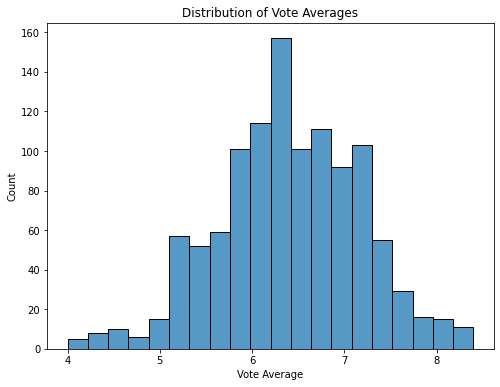

In [62]:
# Create a histogram to show the distribution of vote averages
plt.figure(figsize=(8, 6))
sns.histplot(x='vote_average', data=merged_df3, bins=20)
plt.xlabel('Vote Average')
plt.ylabel('Count')
plt.title('Distribution of Vote Averages')
plt.show()

From the histogram above, I can observe that a majority of movies received a vote average of 6 to 6.5.

#### ii) A kernel density plot to show the distribution of production budgets

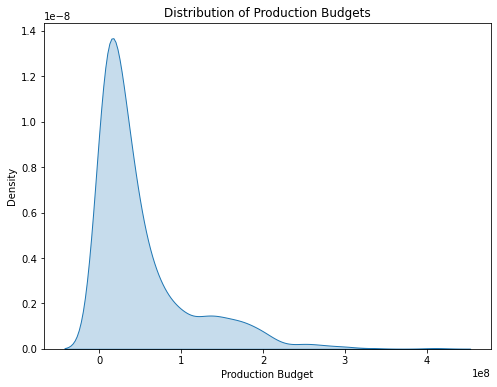

In [63]:
# Create a kernel density plot to show the distribution of production budgets
plt.figure(figsize=(8, 6))
sns.kdeplot(x='production_budget', data=merged_df3, shade=True)
plt.xlabel('Production Budget')
plt.title('Distribution of Production Budgets')
plt.show()


From the above kernel density, the peak denotes the value of the production budget that is most frequently observed among the movies. I can observe that the peak of the distribution is skewed to the right, this suggests that a majority of movies have lower production budgets, with fewer movies having higher production budgets.

#### iii) A histogram to show the distribution of vote count

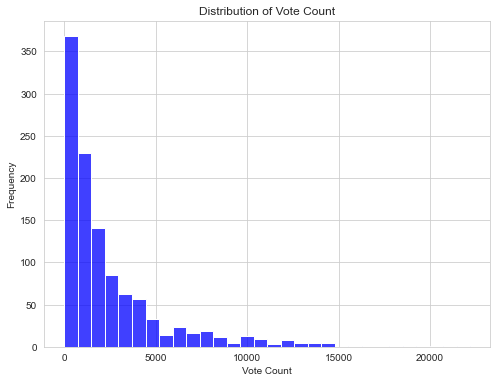

In [64]:
# Create a histogram to show distribution of vote count
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
sns.histplot(x=merged_df3['vote_count'], bins=30, kde=False, color='blue')
plt.title('Distribution of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

From the above histogram, I can observe that a majority of the movies have low vote counts since the peak of the histogram is skewed to the right.

### Bivariate Analysis 

Here I will be generating plots to describe the relationships between different features/variables.

#### i) A scatter plot showing the relationship between `worldwide_gross` and `domestic_gross`

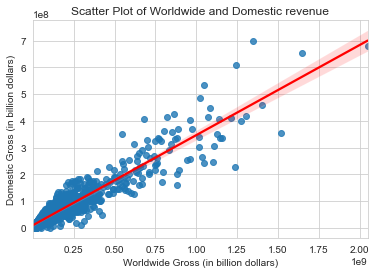

In [65]:
# Creating a scatter plot
sns.regplot(x='worldwide_gross', y='domestic_gross_2', data=merged_df3, line_kws={'color':'red'})
plt.xlabel('Worldwide Gross (in billion dollars)')
plt.ylabel('Domestic Gross (in billion dollars)')
plt.title('Scatter Plot of Worldwide and Domestic revenue')
plt.show()

Uisng the line of best fit from the above scatter plot, I can observe and conclude that there is a positive correlation between `worldwide_gross` and `domestic_gross_2` variables. This means that as the domestic revenue from a movie increases, its worldwide revenue increases too.

#### ii) A box plot showing the distribution of `production_budget`, `domestic_gross_2` and `worldwide_gross` revenues.

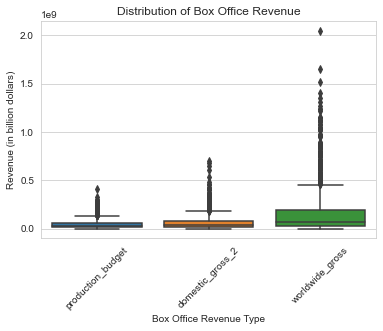

In [66]:
# Checking for distribution of revenues using a boxplot
sns.boxplot(data=merged_df2[['production_budget', 'domestic_gross_2', 'worldwide_gross']])
plt.title('Distribution of Box Office Revenue')
plt.xticks(rotation=45)
plt.xlabel('Box Office Revenue Type')
plt.ylabel('Revenue (in billion dollars)')
plt.show()

The boxplot above shows the distribution of `production_budget`, `domestic_gross_2` and `worldwide_gross` variables. There's quite a vast number of outliers in all the three variables. But given that this is a Movies dataset, I will keep the outliers, since they are representative of the real world data whereby we can have some Box Office movies performing exceptionally well in the market.

#### iii) A bar plot showing the Top 20 Studios by the number of movies produced

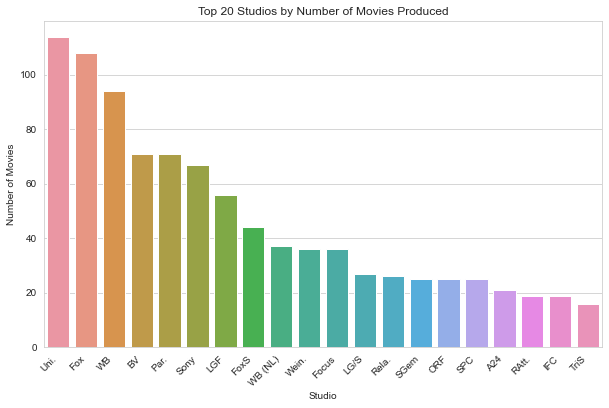

In [67]:
# Group the data by studio and count the number of movies for each studio
grouped_by_studio = merged_df3.groupby('studio')['title'].count().reset_index()
grouped_by_studio = grouped_by_studio.rename(columns={'title': 'count'})

# Sort the data by count in descending order and keep only the top 20 studios
grouped_by_studio = grouped_by_studio.sort_values('count', ascending=False).head(20)

# Create a bar plot to show the number of movies produced by each studio
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='studio', y='count', data=grouped_by_studio)
ax.set(xlabel='Studio', ylabel='Number of Movies', title='Top 20 Studios by Number of Movies Produced')
plt.xticks(rotation=45, ha='right')
plt.show()

The bar plot above shows the distribution of number of movies produced by studios. From the bar plot, it is clear that Uni. Studio takes the lead in movie production followed by Fox and WB. But it is important to note that producing more movies doesn't necessarily mean that it is the best performing studio. Other factors such as return on investment must be considered too. 

## Performing Aggregations to answer Business Question no.1

The business question:
- What are the top 4 best performing genres of movies at the box office?

Here I use the `groupby()` built-in method and group the dataset by the `genres` column to answer the question.

Also of importance to note is that some movies are a mixture of different genres.
So it begs the question, to either treat each genre ID individually or as a whole?
The answer to this question depends on the analysis being performed. If one is analyzing the popularity of each individual genre separately, then they would treat each ID individually. However, if one is analyzing the popularity of movies with a specific combination of genres, then they would treat the list of IDs as a whole.

That said, I will be treating the list of genres IDs as a whole, since a movie can be of one genre or also a combination of different genres.

In addition, you can get the definitions of the various `genre_ids` values at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee)

To gain a better understanding of the current trends in the movie industry, it may be useful to explore multiple perspectives and consider how they relate to one another. I will compare the top genres across different groupings and look for patterns or similarities that may provide insight into overarching trends.

It's also important to keep in mind that the top genres by one metric may not necessarily be the same as the top genres by another metric. For example, a genre may be highly profitable but not very popular among audiences, or it may receive high ratings but not generate a lot of revenue. Therefore, it's important to consider multiple metrics when analyzing the data to get a more comprehensive understanding of the current trends in the movie industry.

To come up with a final top 4, I will consider the top genres across multiple metrics and determine which genres are consistently ranking high across the board. For instance, I will create plots that show the rankings for each genre by `domestic_gross_2`, `worldwide_gross`, `popularity`, `vote_count`, and `vote_average`, and then compare the results.

#### i) Group the DataFrame by `genre_ids` and sum `domestic_gross_2`

In [68]:
# Group the DataFrame by `genre_ids`
# Then sort in Descending order by `domestic_gross_2`
grouped_genre = merged_df3.groupby('genres')['domestic_gross_2'].sum().sort_values(ascending=False)
grouped_genre.head()

genres
(Comedy,)                                        4146421980
(Action, Adventure, Science Fiction)             3814586155
(Drama,)                                         2297463879
(Action, Adventure, Fantasy)                     1910474900
(Action, Adventure, Fantasy, Science Fiction)    1717846297
Name: domestic_gross_2, dtype: int64

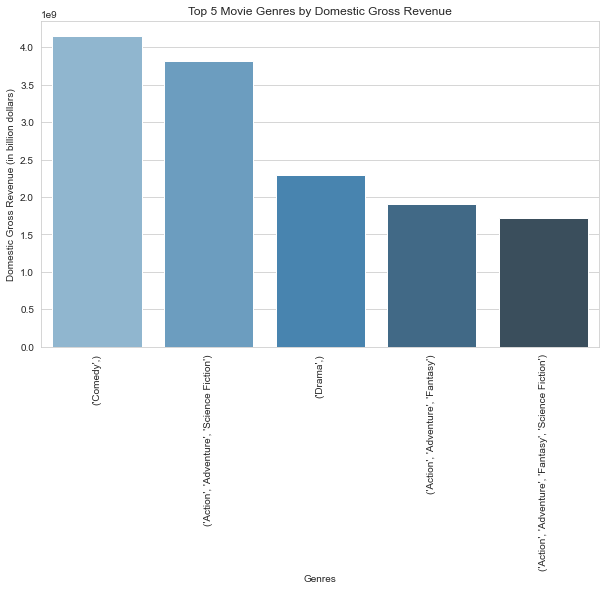

<Figure size 432x288 with 0 Axes>

In [69]:
# get the top 5 genres
top_genres = grouped_genre.head(5)

# plot the domestic gross revenue for each of the top 5 genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='Blues_d')
plt.title('Top 5 Movie Genres by Domestic Gross Revenue')
plt.xlabel('Genres')
plt.ylabel('Domestic Gross Revenue (in billion dollars)')
plt.xticks(rotation=90)
plt.show()
plt.savefig('visualization1.png')

Using the definitions of the various `genre_ids` values at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee); 

From the above results, the top 5 `genre` sorted by `domestic_gross_2` are:
 1. **Comedy** 
 2. **Action, Adventure & Science Fiction** 
 3. **Drama**
 4. **Action, Adventure & Fantasy**
 5. **Action, Adventure, Fantasy & Science Fiction**

#### ii) Group the DataFrame by `genre_ids` and sum `worldwide_gross`

In [70]:
# Group the DataFrame by `genre_ids`
# Then sort in Descending order by `worldwide_gross`
grouped_genre2 = merged_df3.groupby('genres')['worldwide_gross'].sum().sort_values(ascending=False)
grouped_genre2.head()

genres
(Action, Adventure, Science Fiction)             9871431305
(Comedy,)                                        7158659968
(Action, Adventure, Fantasy)                     6666020354
(Action, Adventure, Fantasy, Science Fiction)    4235307048
(Drama,)                                         3856186439
Name: worldwide_gross, dtype: int64

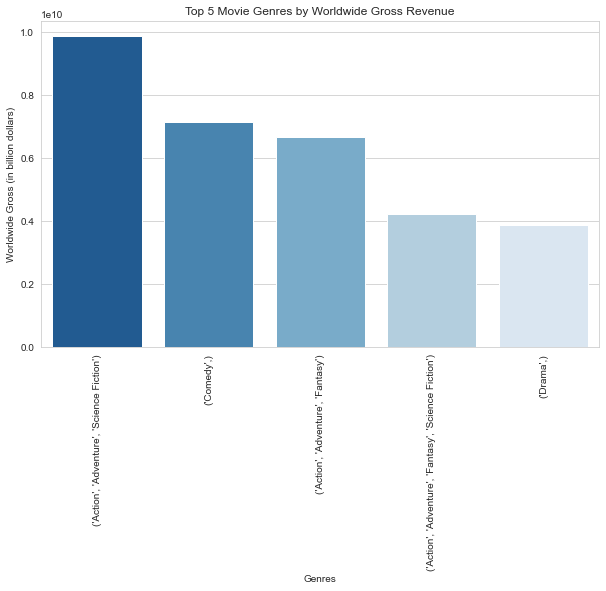

<Figure size 432x288 with 0 Axes>

In [71]:
# Select the top 5 movie genres with the highest worldwide gross
top_genres2 = grouped_genre2.head(5)

# Plot the worldwide gross for each of the top 5 genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres2.index, y=top_genres2.values, palette='Blues_r')
plt.title('Top 5 Movie Genres by Worldwide Gross Revenue')
plt.xlabel('Genres')
plt.ylabel("Worldwide Gross (in billion dollars)")
plt.xticks(rotation=90)
plt.show()
plt.savefig('visualization2.png')

Using the definitions of the various `genre_ids` values provided at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee); 

From the above results, the top 5 `genre_ids` sorted by `worldwide_gross` are:
 1. **Action, Adventure & Science Fiction**
 2. **Comedy**
 3. **Action, Adventure & Fantasy**
 4. **Action, Adventure, Fantasy & Science Fiction**
 5. **Drama**

#### iii) Group the DataFrame by `genre_ids` and mean of `popularity`

In [72]:
# Group the DataFrame by `genre_ids`
# Then sort in Descending order by `popularity`
grouped_genre3 = merged_df3.groupby('genres')['popularity'].mean().sort_values(ascending=False)
grouped_genre3.head()

genres
(Adventure, Action, Fantasy)                     55.676
(Adventure,)                                     48.508
(Action, Adventure, Science Fiction, Drama)      46.775
(Action, Adventure, Science Fiction, Comedy)     44.729
(Action, Adventure, Science Fiction, Fantasy)    39.293
Name: popularity, dtype: float64

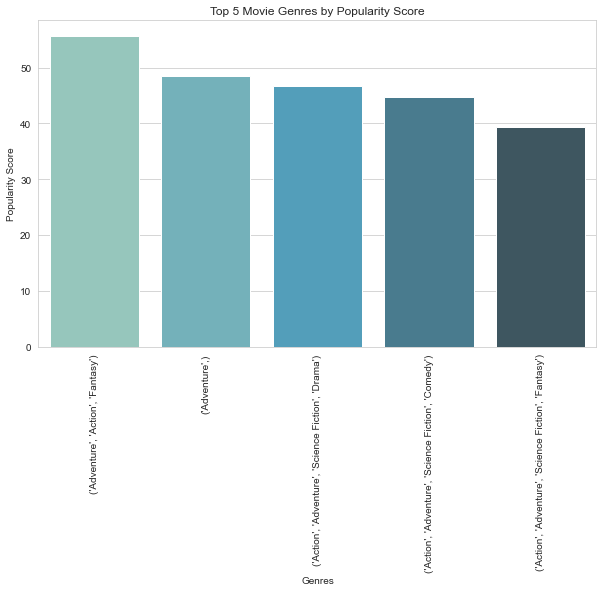

<Figure size 432x288 with 0 Axes>

In [73]:
# Select the top 5 movie genres with the highest popularity score
top_genres3 = grouped_genre3.head(5)

# Plot the popularity score for each of the top 5 genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres3.index, y=top_genres3.values, palette='GnBu_d')
plt.title('Top 5 Movie Genres by Popularity Score')
plt.xlabel('Genres')
plt.ylabel('Popularity Score')
plt.xticks(rotation=90)
plt.show()
plt.savefig('visualization3.png')

Using the definitions of the various `genre_ids` values provided at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee); 

From the above results, the top 5 `genre_ids` sorted by `popularity` are:
 1. **Adventure, Action & Fantasy**
 2. **Adventure**
 3. **Action, Adventure, Science Fiction & Drama**
 4. **Action, Adventure, Science Fiction & Comedy**
 5. **Action, Adventure, Science Fiction & Fantasy**

#### iv) Group the DataFrame by `genre_ids` and sum `vote_count`

In [74]:
# Group the DataFrame by `genre_ids`
# Then sort in Descending order by `vote_count`
grouped_genre4 = merged_df3.groupby('genres')['vote_count'].sum().sort_values(ascending=False)
grouped_genre4.head()

genres
(Action, Adventure, Science Fiction)    126572
(Comedy,)                                98219
(Drama,)                                 90573
(Action, Adventure, Fantasy)             71550
(Action, Science Fiction, Adventure)     60948
Name: vote_count, dtype: int64

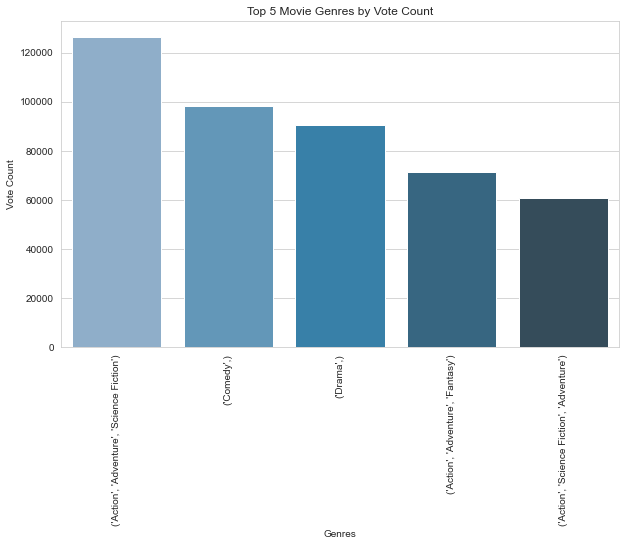

<Figure size 432x288 with 0 Axes>

In [75]:
# Select the top 5 movie genres with the highest vote count
top_genres4 = grouped_genre4.head(5)

# Plot the vote count for each of the top 5 genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres4.index, y=top_genres4.values, palette='PuBu_d')
plt.title('Top 5 Movie Genres by Vote Count')
plt.xlabel('Genres')
plt.ylabel('Vote Count')
plt.xticks(rotation=90)
plt.show()
plt.savefig('visualization4.png')

Using the definitions of the various `genre_ids` values provided at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee); 

From the above results, the top 5 `genre_ids` sorted by `vote_count` are:
 1. **Action, Adventure & Science Fiction**
 2. **Comedy**
 3. **Drama**
 4. **Action, Adventure & Fantasy**
 5. **Action, Science Fiction & Adventure**

#### v) Group the DataFrame by `genre_ids` mean of `vote_average`

In [76]:
# Group the DataFrame by `genre_ids`
# Then sort in Descending order by `vote_average`
grouped_genre5 = merged_df3.groupby('genres')['vote_average'].mean().sort_values(ascending=False)
grouped_genre5.head()

genres
(Drama, Documentary)                               8.2
(Animation, Family, Comedy, Adventure, Fantasy)    8.2
(Drama, History, War)                              8.1
(History, Drama, Thriller, War)                    8.1
(Drama, Comedy, Animation, Family)                 8.0
Name: vote_average, dtype: float64

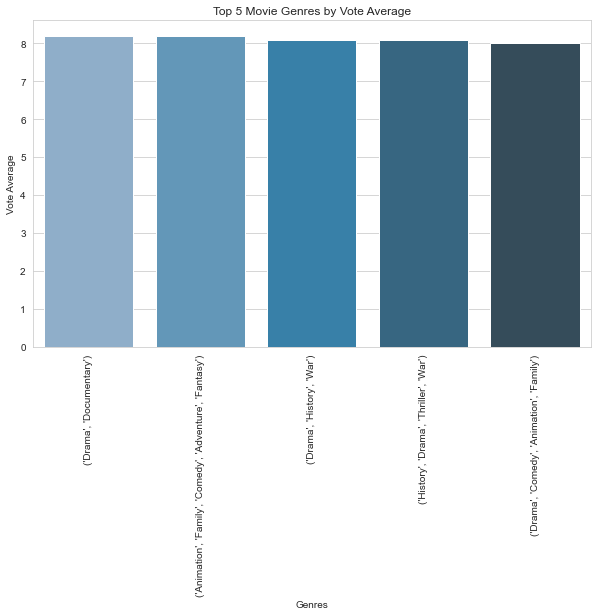

<Figure size 432x288 with 0 Axes>

In [77]:
# Select the top 5 movie genres with the highest vote count
top_genres5 = grouped_genre5.head(5)

# Plot the vote count for each of the top 5 genres using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres5.index, y=top_genres5.values, palette='PuBu_d')
plt.title('Top 5 Movie Genres by Vote Average')
plt.xlabel('Genres')
plt.ylabel('Vote Average')
plt.xticks(rotation=90)
plt.show()
plt.savefig('visualization5.png')

Using the definitions of the various `genre_ids` values provided at [TheMovieDB `genre_ids` definitions](https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee); 

From the above results, the top 5 `genre_ids` sorted by `vote_average` are:
 1. **Drama & Documentary**
 2. **Animation, Family, Comedy, Adventure & Fantasy**
 3. **Drama, History & War**
 4. **History, Drama, Thriller & War**
 5. **Drama, Comedy, Animation & Family**

Therefore, from these 5 sets of analyses I can conclude that the top 4 best performing types of movies are a combination of: 
 - **Action, Adventure & Science Fiction** genres
 - **Action, Adventure & Fantasy** genres
 - **Comedy** genres
 - **Drama** genres

## Creating a correlation matrix to answer Business Question no.2
The business question:

- What is the relationship between production budget and the success of a movie both domestically and worldwide?

Below I create a correlation matrix for the features which are indicators of a successful movie in the Box Office.

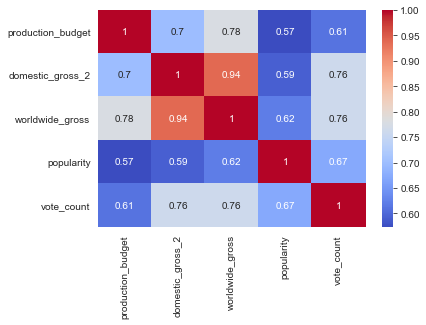

In [78]:
# Performing correlations using seaborn
correlations = merged_df2[['production_budget', 'domestic_gross_2', 'worldwide_gross', 'popularity', 'vote_count']].corr()
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.savefig('visualization6.png')

- The correlation coefficient between `production_budget` and `worldwide_gross` is **0.78**; and between `production_budget` and `domestic_gross_2` is **0.7**. Both figures indicate a strong positive correlation between the variables. This means that as `production_budget` increases, `worldwide_gross` and `domestic_gross_2` tend to increase as well. Therefore, the production budget allocated to a movie production may be a good indicator of its success or failure in the Box Office.


- The correlation coefficient between `domestic_gross_2` and `vote_count` is **0.76**; and between `domestic_gross_2` and `worldwide_gross` is **0.94**. Both figures indicate a strong positive correlation between the variables. This means that as a movie that is successful locally is highly likely to be successful internationally/worldwide as the relationship between the two variables is relatively strong.


- The correlation between `worldwide_gross` and `popularity` is **0.62**. This indicates a moderate positive correlation. This also suggests that as a movie becomes more successful internationally, so does its popularity among the audiences.


- The correlation coefficient between `popularity` and `vote_count` is **0.67**, which indicates a moderate positive correlation between the two variables. This suggests that as a movie becomes more popular, it tends to have a higher number of votes.


- The correlation coefficient between `vote_count` and `worldwide_gross` is **0.76**, which indicates a strong positive correlation between these two variables. This also suggests that as a movie becomes more successful internationally, it tends to have a higher number of votes.

Therefore, based on these correlation coefficients, I can conclude that the production budget allocated to a movie is a good indicator of its success or lack thereof, both domestically and internationally.

## Performing Aggregations and Engineering a new feature `market_share` to answer Business Question no.3

The business question:

 - What is the competitive landscape of the movie industry in terms of market share?
 
In this section I introduce a new feature in my dataset, that is, `market_share` (based on the studios' domestic revenues). I find this to be an important aspect because as Microsoft dives into the movie industry, it's imperative they understand who they are going to be competing against in terms of capturing the audience's attention. The `market_share` is calculated as the sum of a studio's domestic revenue divided by the total domestic revenue of all the studios multiplied by 100%. Finally, I will create a bar plot using Seaborn to illustrate the findings.

In [79]:
# Group by studio and calculate various metrics
grouped = merged_df3.groupby('studio').agg({
    'domestic_gross_2': ['sum', 'count', 'mean'],
    'worldwide_gross': ['sum', 'count', 'mean'],
    'vote_average': 'mean',
    'popularity': 'mean',
    'vote_count': 'sum'})

# Flatten column names
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]

# Sort by `domestic_gross_2_sum`
sorted_grouped = grouped.sort_values(by='domestic_gross_2_sum', ascending=False)

# Calculate market share
sorted_grouped['market_share'] = (sorted_grouped['domestic_gross_2_sum'] / sorted_grouped['domestic_gross_2_sum'].sum())*100

# Display the top 10 studios by `domestic_gross_2_sum`
top_10 = sorted_grouped[['domestic_gross_2_sum', 'worldwide_gross_sum', 'vote_count_sum', 'vote_average_mean', 
                         'popularity_mean', 'market_share']].reset_index().head(10)
top_10

,studio,domestic_gross_2_sum,worldwide_gross_sum,vote_count_sum,vote_average_mean,popularity_mean,market_share
0,BV,12826174501,33092279960,367266,6.884507,20.720789,17.611013
1,Uni.,10522372515,26942069716,310000,6.193860,15.427272,14.447772
2,Fox,9223170866,26359964257,348085,6.359259,15.859574,12.663900
3,WB,8907412947,21807122002,332751,6.418085,16.664053,12.230347
4,Sony,6654419301,16834675820,194687,6.141791,15.923343,9.136868
5,Par.,5953142188,14277819179,228511,6.301408,14.557887,8.173978
6,WB (NL),3417630150,8540864247,111818,6.324324,15.099676,4.692586
7,LGF,3103430608,6643134795,138665,6.357143,13.852536,4.261174
8,P/DW,1682914686,5078027601,33781,6.520000,14.669800,2.310731
9,LG/S,1211412751,3177476448,85477,6.411111,16.816963,1.663334


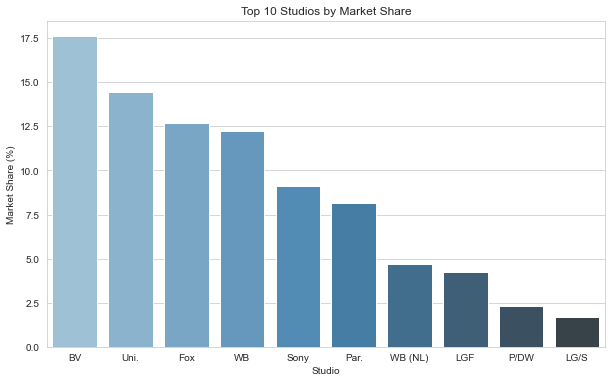

<Figure size 432x288 with 0 Axes>

In [80]:
# Creating a barplot using Seaborn to visualize the above findings
top_10 = sorted_grouped[['domestic_gross_2_sum', 'worldwide_gross_sum', 'vote_count_sum', 'vote_average_mean', 
                         'popularity_mean', 'market_share']].reset_index().head(10)

sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='studio', y='market_share', data=top_10, ax=ax, palette='Blues_d')
ax.set_xlabel('Studio')
ax.set_ylabel('Market Share (%)')
ax.set_title('Top 10 Studios by Market Share')
plt.show()
plt.savefig('visualization7.png')

Based on the above analysis, BV Studio has the highest domestic and worldwide gross revenue, the highest total vote count, and the highest mean popularity. BV Studio has a market share of 17.6%, followed by Uni. with 14.5% and Fox with 12.7%. This suggests that BV Studio is the clear leader in many metrics. This provides insight into the competitive landscape of the movie industry based on the chosen metrics. 

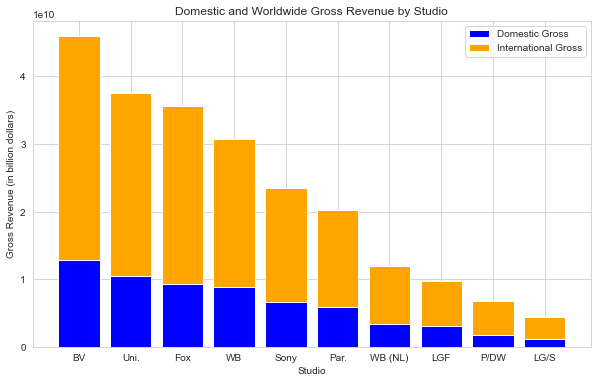

<Figure size 432x288 with 0 Axes>

In [81]:
# Create a stacked bar chart of domestic and worldwide gross for each studio
# Subset the data to only include the top 10 studios by market share
top_10_ = sorted_grouped.sort_values('market_share', ascending=False).reset_index().head(10)

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(top_10_['studio'], top_10_['domestic_gross_2_sum'], label='Domestic Gross', color='blue')
ax.bar(top_10_['studio'], top_10_['worldwide_gross_sum'], bottom=top_10_['domestic_gross_2_sum'],
       label='International Gross', color='orange')
ax.set_xlabel('Studio')
ax.set_ylabel('Gross Revenue (in billion dollars)')
ax.set_title('Domestic and Worldwide Gross Revenue by Studio')
ax.legend()
plt.show()
plt.savefig('visualization8.png')

The stacked bar plot shows the domestic and worldwide gross revenue of the top 10 movie studios, broken down by region,i.e.Domestic revenue and Worldwide revenue. Each bar represents a studio, and is divided into two sections: blue for domestic gross revenue, and orange for worldwide gross revenue.

The height of each bar represents the total gross revenue for that studio, and the width of each section represents the proportion of that revenue coming from the domestic or worldwide market. For example, the tallest bar represents BV Studio, and we can see that the majority of its revenue comes from the international market.

Overall, this plot helps us visualize the revenue breakdown of the top movie studios, and can provide insights into the relative importance of different regions for these studios. This is also an indicator to Microsoft's new movie studio, in that they can anticipate more of their revenue generated from the international market, as compared to the domestic market.

## Performing Aggregations to answer Business Question no.4

The business question:
-  How does the release time of a movie contribute to its success?

Here I will be using the `worldwide_gross` and `domestic_gross_2` variables as my units of measurement to depict the revenues generated in the different months and hence determine when it is suitable to release a movie, thereby increasing its chances of success.

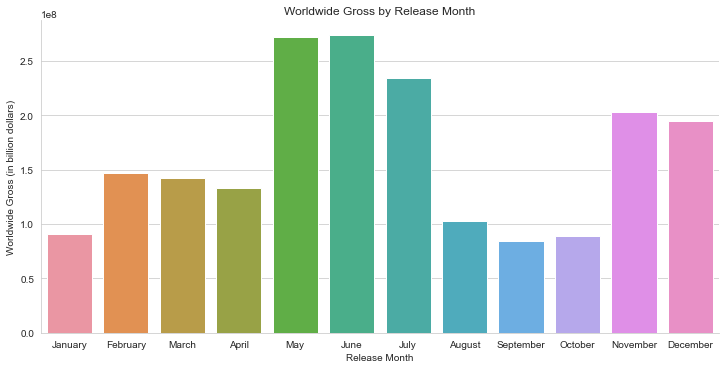

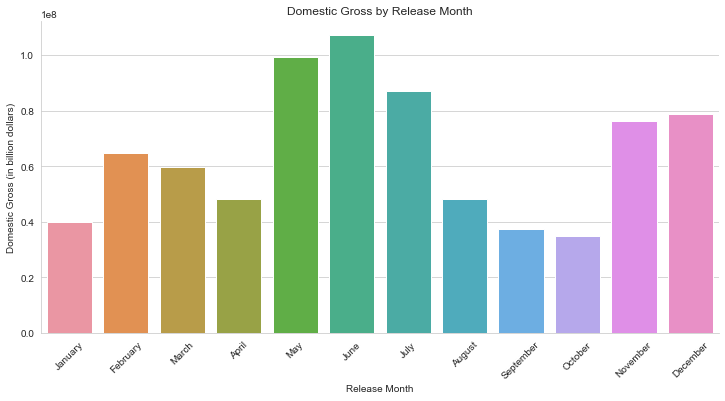

In [82]:
# Convert the 'release_date_2' column to datetime format
merged_df3['release_date_2'] = pd.to_datetime(merged_df3['release_date_2'])

# Extract the release month from the release date
merged_df3['release_month'] = merged_df3['release_date_2'].dt.month

# Calculate the average worldwide gross by release month
avg_world_gross = merged_df3.groupby('release_month')['worldwide_gross'].mean().reset_index()

# Calculate the average domestic gross by release month
avg_dom_gross = merged_df3.groupby('release_month')['domestic_gross_2'].mean().reset_index()

# Convert month numbers to month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Worldwide gross plot
worldwide_plot = sns.catplot(x='release_month', y='worldwide_gross', kind='bar', data=avg_world_gross, height=5, aspect=2)
worldwide_plot.set(title='Worldwide Gross by Release Month', xlabel='Release Month', 
                   ylabel='Worldwide Gross (in billion dollars)')
plt.savefig('visualization9.png')

# Domestic gross plot
domestic_plot = sns.catplot(x='release_month', y='domestic_gross_2', kind='bar', data=avg_dom_gross, height=5, aspect=2)
domestic_plot.set(title='Domestic Gross by Release Month', xlabel='Release Month',
                  ylabel='Domestic Gross (in billion dollars)')
plt.savefig('visualization10.png')

# Setting xticks with month names and align them with the center of the bars
plt.xticks(horizontalalignment='center', rotation=45, fontsize=10)
worldwide_plot.set_xticklabels(month_names)
domestic_plot.set_xticklabels(month_names)

# Adjust the position of the plots to prevent overlapping xtick labels
plt.subplots_adjust(wspace=0.5)

The above plots show the average worldwide gross and domestic gross by release month for the movies in the dataset.

The x-axis shows the months of the year, and the y-axis shows the average gross in billion dollars. Each bar represents the average gross for a particular month.

The "Worldwide Gross by Release Month" plot shows that the months of May, June and July have the highest average worldwide gross, while the months of September and October have the lowest.

The "Domestic Gross by Release Month" plot show a similar trend, with May, June and July having the highest average domestic gross, and September and October having the lowest.

Overall, these plots suggest that releasing a movie in May, June or July may lead to higher gross revenue, both domestically and worldwide, while releasing a movie in September or October may result in lower gross revenue.

# Conclusion

This analysis leads to four **recommendations** that will enable Microsoft get into the movie industry with a resounding success for the movies that will be produced/created.

1. Based on the findings of the top 4 best performing types of movies in the Box Office, Microsoft should consider producing movies around the genre combinations of:
 - **Action, Adventure & Science Fiction** 
 - **Action, Adventure & Fantasy**
 - **Comedy** 
 - **Drama**
 
 Also, they can play around the genres creatively and come up with something a bit unique, for example, a combination of **Action, Comedy & Drama** or even **Science Fiction, Adventure & Comedy** to see the response and reaction from the movie lovers. 


2. Based on the findings of strong positive correlation between production budget and domestic gross, and production budget and worldwide gross, for the genres stated above in the first recommendation, the Head of Microsoft's new movie studio should liase with the finance department and ensure that sufficient budgetary allocation is made to film production. This would enable the several aspects involved in film production to be taken care of sufficiently, for instance;
 - Production equipment: Getting the latest equipment and editing tools is key to producing high quality video content.

 - Visuals and Sound: The visual elements of a movie are critical in creating an immersive and engaging experience for viewers. This includes everything from the cinematography and special effects to the costumes and set design. A good soundtrack can help set the tone of a film and enhance the emotional impact of key scenes. 
 
 - Marketing: Finally, filmmakers will need to consider the marketing and distribution of the new movie. They will need to think about how they will promote the movie and ensure that it is being distributed in a way that will reach their intended audience. Effective marketing will certainly increase the movie's popularity, which in turn may mean success for the new movie.

   Therefore, the investment in a movie's production really influences its success in the Box Office.


3. Based on the findings of how competitive the movie industry is in terms of market share, Microsoft will need to differentiate itself in order to stand out, for example;
 - Microsoft's new movie studio could focus on producing high-quality movies with unique and compelling storylines with diverse and inclusive casts.
 - Partnering with well-known and respected directors and actors.
 - Leveraging innovative marketing and distribution strategies to reach wider audiences. 
 - Additionally, they could explore new combinations of the popular genres as stated in the first recommendation.
 
 
4. Based on the findings of the best months to release a movie being May, June and July, the Microsoft new mvoie studio should consider releasing movies around this time. There could be various factors that contribute to the high revenues in May, June and July. One possibility is that these months fall within the summer blockbuster season, which typically runs from May to August, where studios release highly anticipated movies that are expected to perform well at the box office, as well as audience availability. Therefore, if Microsoft takes advantage of this period, the movies released are likely to yield higher gross revenues.